In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
import plotly.express as px
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from kneed import KneeLocator

In [300]:
df = pd.read_csv("C:/publicacions_facebook_thailandia.csv")
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [301]:
df.shape

(7050, 16)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [303]:
df_clean = df.drop_duplicates()
if len(df_clean) == len(df):
    print("No hi ha elements duplicats")
else:
    print("Hi ha elements duplicats")

Hi ha elements duplicats


In [304]:
# miro com s'ha reduit amb els elements duplicats
df_clean.shape

(6999, 16)

In [305]:
# mirant la informació veiem que les columnes 1-4 tenen 0 valors que no són nuls, per tant ho podem eliminar
# també elimino la data i el id perque no són importants per l'anàlisi.

df1 = df_clean.drop(['Column1','Column2','Column3','Column4','status_id','status_published'], axis = 1)
df1.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [306]:
df_norm = df1.copy()

In [307]:
# aplico l'escalat a les columnes no categòriques
scaler = StandardScaler()
df_norm[['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']] = scaler.fit_transform(df_norm[['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']])

In [308]:
df_norm.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,0.671318,0.320886,1.679382,0.505219,1.976073,0.200243,0.076069,0.518160,-0.15999
1,photo,-0.165606,-0.252669,-0.304903,-0.136392,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999
2,video,0.004428,0.011704,0.126793,-0.013530,0.205677,-0.028985,0.076069,-0.157059,-0.15999
3,photo,-0.251728,-0.252669,-0.304903,-0.225125,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999
4,photo,-0.026487,-0.252669,-0.304903,-0.013530,-0.093545,-0.143599,-0.175780,-0.157059,-0.15999


In [309]:
df_norm.tail()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
7045,photo,-0.300309,-0.252669,-0.304903,-0.275180,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999
7046,photo,-0.461511,-0.252669,-0.304903,-0.445821,-0.293026,-0.143599,0.076069,-0.157059,-0.15999
7047,photo,-0.492427,-0.252669,-0.304903,-0.475399,-0.293026,-0.143599,-0.175780,-0.157059,-0.15999
7048,photo,0.278251,-0.239226,-0.138284,0.316376,-0.268091,-0.143599,-0.175780,-0.157059,-0.15999
7049,photo,-0.459303,-0.252669,-0.304903,-0.438995,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999


In [310]:
# veig que es manté el tamany
df_norm.shape

(6999, 10)

In [311]:
# faig les columnes dummies
df_norm = pd.get_dummies(df_norm, columns=['status_type'])
df_norm.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.671318,0.320886,1.679382,0.505219,1.976073,0.200243,0.076069,0.518160,-0.15999,0,0,0,1
1,-0.165606,-0.252669,-0.304903,-0.136392,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999,0,1,0,0
2,0.004428,0.011704,0.126793,-0.013530,0.205677,-0.028985,0.076069,-0.157059,-0.15999,0,0,0,1
3,-0.251728,-0.252669,-0.304903,-0.225125,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999,0,1,0,0
4,-0.026487,-0.252669,-0.304903,-0.013530,-0.093545,-0.143599,-0.175780,-0.157059,-0.15999,0,1,0,0


In [312]:
df_norm.tail()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
7045,-0.300309,-0.252669,-0.304903,-0.275180,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999,0,1,0,0
7046,-0.461511,-0.252669,-0.304903,-0.445821,-0.293026,-0.143599,0.076069,-0.157059,-0.15999,0,1,0,0
7047,-0.492427,-0.252669,-0.304903,-0.475399,-0.293026,-0.143599,-0.175780,-0.157059,-0.15999,0,1,0,0
7048,0.278251,-0.239226,-0.138284,0.316376,-0.268091,-0.143599,-0.175780,-0.157059,-0.15999,0,1,0,0
7049,-0.459303,-0.252669,-0.304903,-0.438995,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999,0,1,0,0


In [313]:
# veig que es manté el mateix tamany
df_norm.shape

(6999, 13)

# K-Means

In [314]:
# per poder aplicar l'algoritme k-means em de saber cuants clusters em d'emprar
# faig la curva de l'elbow
kmeans_kwargs = {"init":"k-means++",
                "n_init" : 20,
                "max_iter" : 500,
                "random_state" : 42,}
# una llista dels SEE valors per cada k
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(df_norm)
    sse.append(kmeans.inertia_)

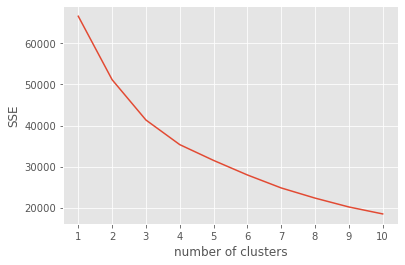

In [315]:
plt.style.use("ggplot")
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("SSE")
plt.show()

In [316]:
# vaig a utilitzar kneed
kl = KneeLocator(range(1,11), sse, curve = "convex", direction = "decreasing")
kl.elbow

4

## aplicando el método means a la base de datos

In [317]:
# si volgués fer el clusterer amb el format pipeline:
clusterer = Pipeline(
                     [("kmeans",
                       KMeans(n_clusters = 4,
                             init = "k-means++",
                             n_init = 50,
                             max_iter = 500,
                             verbose = 0,
                             tol = 1e-4,
                             random_state = 42,
                             ),
                       ),
                      ]
)

In [318]:
clusterer.fit(df_norm)

Pipeline(steps=[('kmeans',
                 KMeans(max_iter=500, n_clusters=4, n_init=50,
                        random_state=42))])

In [319]:
# entreno el model
kmeans = KMeans(n_clusters = 4,
                n_init = 20,
                max_iter = 500,
                verbose = 0,
                tol = 1e-4,
                random_state = 42
                ) # creamos el modelo
kmeans.fit(df_norm)

KMeans(max_iter=500, n_clusters=4, n_init=20, random_state=42)

In [320]:
# el valor sse més baix.
kmeans.inertia_

35350.46702382122

In [321]:
# el número de vegades que han d'iterar fins convergir
kmeans.n_iter_

10

In [322]:
# aquí tindrem el centre dels 4 clusters formats
kmeans.cluster_centers_

array([[-2.67485568e-01, -1.80108207e-01, -1.94733836e-01,
        -2.55349066e-01, -1.86888760e-01, -8.76999489e-02,
        -1.08833174e-01, -8.71975772e-02, -1.12735949e-01,
         7.97136815e-03,  6.53489507e-01,  4.53879941e-02,
         2.93151131e-01],
       [ 6.07389157e-01,  2.53684427e+00,  2.48225327e+00,
         3.97558052e-01,  2.26954121e+00,  2.52104725e-01,
         1.08118731e+00,  1.19032496e+00,  1.50595621e+00,
        -6.93889390e-18,  4.75113122e-02, -2.77555756e-17,
         9.52488688e-01],
       [ 3.39984529e+00, -1.88890435e-01, -2.20626379e-01,
         3.52643200e+00, -2.56220589e-01,  9.38592616e-02,
        -1.37600654e-01, -1.40897085e-01, -1.52265000e-01,
         3.72340426e-02,  5.45212766e-01,  2.12765957e-01,
         2.04787234e-01],
       [ 2.86546911e+00,  1.67243492e+00,  5.37730766e+00,
         1.99916519e+00,  7.11785113e+00,  1.15403004e+01,
         7.14266398e+00,  1.84874060e+00,  2.48843751e+00,
        -3.46944695e-18,  2.94117647e

## agregando la clasificación al modelo original

In [323]:
# els labels corresponen als clusters associats a cada punt
kmeans_labels = kmeans.labels_
# els afegeixo a la base de dades original
df_norm['KMeans_Clusters'] = kmeans.labels_
df_norm.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video,KMeans_Clusters
0,0.671318,0.320886,1.679382,0.505219,1.976073,0.200243,0.076069,0.518160,-0.15999,0,0,0,1,1
1,-0.165606,-0.252669,-0.304903,-0.136392,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999,0,1,0,0,0
2,0.004428,0.011704,0.126793,-0.013530,0.205677,-0.028985,0.076069,-0.157059,-0.15999,0,0,0,1,0
3,-0.251728,-0.252669,-0.304903,-0.225125,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999,0,1,0,0,0
4,-0.026487,-0.252669,-0.304903,-0.013530,-0.093545,-0.143599,-0.175780,-0.157059,-0.15999,0,1,0,0,0


## aplicació de PCA al model

Per poder fer la PCA primer em de saber quants components hem d'emprar, veiem que per explicar el 100% de la variança són necessaris 8 elements, com que 8 elements no els puc representar gràficament triaré 2d.

Text(0, 0.5, 'number of cumulative explained variance')

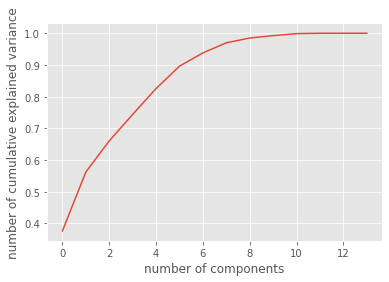

In [324]:
pca = PCA().fit(df_norm)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('number of cumulative explained variance')

Un cop feta la gràfica podem observar que la variança explicada estarà entre 0,6 i 0,7

In [325]:
# faig la disminució de dimensions a 2
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(df_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Componente_1','Componente_2'])
principalDf.head()

,Componente_1,Componente_2
0,2.479393,-0.133110
1,-0.715156,0.094340
2,0.181308,-0.160935
3,-0.767367,-0.010601
4,-0.536005,0.205859


In [326]:
# com podem observar el primer component explica un 37% i el segon un 18%
pca.explained_variance_ratio_

array([0.3755706 , 0.18591452])

In [327]:
# vaig a mirar els indicadors del número de clusters per veure si he d'emprar
# els mateixos
kmeans_kwargs = {"init":"k-means++",
                "n_init" : 20,
                "max_iter" : 500,
                "random_state" : 42,}
# una llista dels SEE valors per cada k
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(principalDf)
    sse.append(kmeans.inertia_)

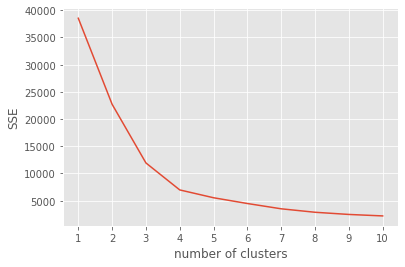

In [328]:
plt.style.use("ggplot")
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("SSE")
plt.show()

Podem veure com la forma és més pronunciada que sense aplicar CAP

In [329]:
# vaig a utilitzar kneed
kl = KneeLocator(range(1,11), sse, curve = "convex", direction = "decreasing")
kl.elbow

4

In [330]:
# si faig el coeficient de silhouette
silhouette_coefficients = []
for k in range (2,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(principalDf)
    score = silhouette_score(principalDf, kmeans.labels_)
    silhouette_coefficients.append(score)

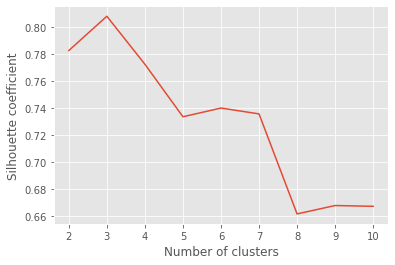

In [331]:
## plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

In [332]:
# vaig a fer cas al coeficient de silhouette per número de clústers que diu que 
# 3 és l'òptim
kmeans_cap = KMeans(n_clusters = 3,
                n_init = 20,
                max_iter = 500,
                verbose = 0,
                tol = 1e-4,
                random_state = 42
                ) # creamos el modelo
# ara vull entrenar el mateix model amb les dimensions reduïdes, teòricament
# hauria de millorar el model, trio principalDf perque té els dos components
# sense els clústers assignats inicialment:
kmeans_cap.fit(principalDf)

KMeans(max_iter=500, n_clusters=3, n_init=20, random_state=42)

In [333]:
# els labels corresponen als clusters associats a cada punt
kmeans_labels_cap = kmeans_cap.labels_
# els afegeixo a la base de dades de CAP
principalDf['KMeans_Clusters_cap'] = kmeans_cap.labels_
# els afegeixo a la base de dades original
df_norm['KMeans_Clusters_cap'] = kmeans_labels_cap
principalDf.head()

,Componente_1,Componente_2,KMeans_Clusters_cap
0,2.479393,-0.133110,0
1,-0.715156,0.094340,0
2,0.181308,-0.160935,0
3,-0.767367,-0.010601,0
4,-0.536005,0.205859,0


In [344]:
# aquí tindrem els 3 clústers
kmeans_cap.cluster_centers_

array([[-0.44405815, -0.19795352],
       [ 6.86488031, -1.82854935],
       [ 2.06795569,  4.77048546]])

C:\Users\imber\AppData\Local\Temp\ipykernel_10020\1734922568.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


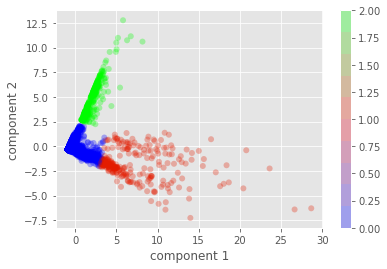

In [334]:
# ho representen gràficament
plt.scatter(pca_nombres_data['Componente_1'], pca_nombres_data['Componente_2'],
           c = principalDf['KMeans_Clusters_cap'], 
           edgecolor = 'none',
           alpha = 0.3,
           cmap = plt.cm.get_cmap('brg', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Exercici 2: Classifica els diferents registres utilitzant l'algoritme de clustering jeràrquic.

In [335]:
# extrec els valors
X = df_norm.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]].values
X

array([[ 0.32088561,  1.67938232,  0.50521896, ...,  0.        ,
         1.        ,  1.        ],
       [-0.25266868, -0.30490291, -0.13639164, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.011704  ,  0.12679273, -0.01353004, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.25266868, -0.30490291, -0.47539865, ...,  0.        ,
         0.        ,  0.        ],
       [-0.239226  , -0.13828354,  0.31637612, ...,  0.        ,
         0.        ,  0.        ],
       [-0.25266868, -0.30490291, -0.43899522, ...,  0.        ,
         0.        ,  0.        ]])

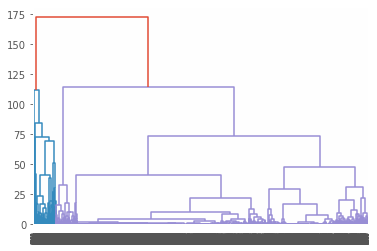

In [336]:
# faig el dendrograma
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

Si observem el dendrograma la majoria despai on no es produeix cap intersecció és el final, per tant jo posaria només dos clústers

In [337]:
clusteringjerarquic = AgglomerativeClustering(n_clusters = 2, 
                                              affinity = 'euclidean',
                                              linkage = 'ward')
clusteringjerarquic.fit(X)
jerarquic_labels = clusteringjerarquic.labels_
jerarquic_labels

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [338]:
# afegeixo els clústers assignats a cada registre a la base de dades
df_norm['Jerarquic_clusters'] = jerarquic_labels

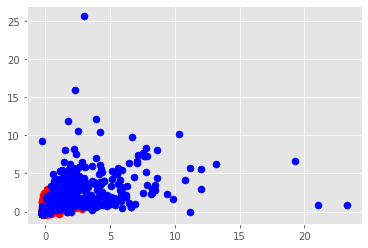

In [339]:
plt.scatter(X[jerarquic_labels==0, 0], X[jerarquic_labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[jerarquic_labels==1, 0], X[jerarquic_labels==1, 1], s=50, marker='o', color='blue')


## Exercici 3: Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

## classificació K-Means

In [340]:
kmeans_silhouette = silhouette_score(df_norm, kmeans_labels).round(2)
print('kmeans:', kmeans_silhouette)

kmeans: 0.72


## classificació K-Means amb cap

In [341]:
kmeans_cap_silhouette = silhouette_score(principalDf, kmeans_labels_cap).round(2)
print('kmeans amb cap:', kmeans_cap_silhouette)

kmeans amb cap: 0.82


## classificació clústering jeràrquic

In [342]:
jerarquic_silhouette = silhouette_score(X, jerarquic_labels).round(2)
print('clustering jerarquic', jerarquic_silhouette)

clustering jerarquic 0.74


## database final amb els clústers dels dos models

In [343]:
# database inicial amb l'assignació dels clusters dels 3 models.
df_norm = df_norm.reindex(columns = ['KMeans_Clusters',
                         'KMeans_Clusters_cap','Jerarquic_clusters', 'num_reactions', 'num_comments','num_shares','num_likes',
                         'num_loves','num_vows','num_hahas','num_sads','num_angrys','status_type_link','status_type_photo',
                         'status_type_video'])
df_norm.head(10)

,KMeans_Clusters,KMeans_Clusters_cap,Jerarquic_clusters,num_reactions,num_comments,num_shares,num_likes,num_loves,num_vows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_video
0,1,0,1,0.671318,0.320886,1.679382,0.505219,1.976073,NaN,0.076069,0.518160,-0.159990,0,0,1
1,0,0,0,-0.165606,-0.252669,-0.304903,-0.136392,-0.317962,NaN,-0.175780,-0.157059,-0.159990,0,1,0
2,0,0,0,0.004428,0.011704,0.126793,-0.013530,0.205677,NaN,0.076069,-0.157059,-0.159990,0,0,1
3,0,0,0,-0.251728,-0.252669,-0.304903,-0.225125,-0.317962,NaN,-0.175780,-0.157059,-0.159990,0,1,0
4,0,0,0,-0.026487,-0.252669,-0.304903,-0.013530,-0.093545,NaN,-0.175780,-0.157059,-0.159990,0,1,0
5,0,0,0,-0.017654,-0.245947,-0.304903,0.002396,-0.193286,NaN,-0.175780,-0.157059,-0.159990,0,1,0
6,1,0,0,0.613904,0.435148,0.240397,0.473366,1.427500,NaN,0.327919,-0.157059,4.197101,0,0,1
7,0,0,0,0.154589,0.254792,0.096498,0.113882,0.479964,NaN,0.076069,-0.157059,1.292373,0,0,1
8,0,0,0,-0.048569,-0.251548,-0.304903,-0.027181,-0.193286,NaN,-0.175780,-0.157059,-0.159990,0,1,0
9,0,0,0,-0.121441,-0.242587,-0.297329,-0.097713,-0.243156,NaN,-0.175780,-0.157059,-0.159990,0,1,0
